In [ ]:
# download and link kaggle to colab
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexanderyevchenko","key":"67fa16f895578cbabbd614de142946ae"}'}

In [ ]:
# you may have to rerun this cell 
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 !kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           7638        233  1.0              
madhurpant/world-deaths-and-causes-1990-2019                    World Deaths and Causes (1990 - 2019)               442KB  2022-11-29 07:09:27           1483         36  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           4919        111  1.0              
swaptr/fifa-world-cup-2022-statistics                       

In [ ]:
# download plant data
! kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [00:56<00:00, 37.0MB/s]
100% 2.04G/2.04G [00:56<00:00, 38.9MB/s]


In [ ]:
!unzip /content/plantvillage-dataset.zip
#make sure to add the '-' in 'plantvillage-dataset' ONLY once file unzips

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
import os

# if you get an 'already exists' error, comment out the makedirs lines

'''
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')
'''

loc = "/content/plantvillage-dataset/color"

splitfolders.ratio(loc,output = "output",seed = 42,ratio = (0.80,.1,.1))

Copying files: 54305 files [00:09, 5815.70 files/s]


In [ ]:
for root, dirs, files in os.walk('/content/output'):
  print(f'There are {len(dirs)} directories and {len(files)} images in "{root}"')

There are 3 directories and 0 images in "/content/output"
There are 38 directories and 0 images in "/content/output/val"
There are 0 directories and 37 images in "/content/output/val/Tomato___Tomato_mosaic_virus"
There are 0 directories and 98 images in "/content/output/val/Corn_(maize)___Northern_Leaf_Blight"
There are 0 directories and 62 images in "/content/output/val/Apple___Black_rot"
There are 0 directories and 51 images in "/content/output/val/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"
There are 0 directories and 140 images in "/content/output/val/Tomato___Target_Spot"
There are 0 directories and 118 images in "/content/output/val/Grape___Black_rot"
There are 0 directories and 63 images in "/content/output/val/Apple___Apple_scab"
There are 0 directories and 150 images in "/content/output/val/Blueberry___healthy"
There are 0 directories and 183 images in "/content/output/val/Squash___Powdery_mildew"
There are 0 directories and 105 images in "/content/output/val/Cherry_(i

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import matplotlib
import random

def plot_random_image(target_dir,target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mping.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    return img

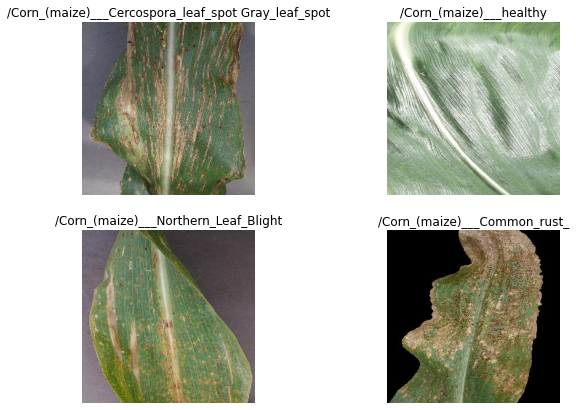

In [ ]:
# plot some random samples from the training dataset

fig = plt.figure(figsize = (10,7))
fig.add_subplot(2,2,1)
img_1 = plot_random_image(target_dir = "/content/output/train",target_class = "/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot")
fig.add_subplot(2,2,2)
img_2 = plot_random_image(target_dir = "/content/output/train",target_class = "/Corn_(maize)___healthy")
fig.add_subplot(2,2,3)
img_3 = plot_random_image(target_dir = "/content/output/train",target_class = "/Corn_(maize)___Northern_Leaf_Blight")
fig.add_subplot(2,2,4)
img_4 = plot_random_image(target_dir = "/content/output/train",target_class = "/Corn_(maize)___Common_rust_")

In [ ]:
def find_file_count(path):
  cpt = sum([len(files) for r, d, files in os.walk(f"{path}")])
  return cpt

train_length = find_file_count('/content/output/train')
test_length = find_file_count('/content/output/test')
val_length = find_file_count('/content/output/val')
print(f'Training images: {train_length}, Testing images: {test_length}, Validation images: {val_length}')

Training images: 43429, Testing images: 5459, Validation images: 5417


In [ ]:
import glob
import shutil

# due to training and file size limits, choosing to work with corn only
# if 'already exists' message, comment out makedirs line below

train_img_fol = glob.glob('/content/output/train')
test_img_fol = glob.glob('/content/output/test')
val_img_fol =  glob.glob('/content/output/val')

def move_directory(initial, end, corn_list):
  for i in corn_list:
    shutil.move(initial + '/' + i, end + '/' + i)


corn_list = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___healthy', 
            'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Common_rust_']

move_directory('/content/output/train', '/content/output/train/corn', corn_list)
move_directory('/content/output/test', '/content/output/test/corn', corn_list)
move_directory('/content/output/val', '/content/output/val/corn', corn_list)

In [ ]:
tr_gls = glob.glob('/content/output/train/corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/*')
tr_cr = glob.glob('/content/output/train/corn/Corn_(maize)___Common_rust_/*')
tr_nlb = glob.glob('/content/output/train/corn/Corn_(maize)___Northern_Leaf_Blight/*')
tr_hlt = glob.glob('/content/output/train/corn/Corn_(maize)___healthy/*')

val_gls = glob.glob('/content/output/val/corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/*')
val_cr = glob.glob('/content/output/val/corn/Corn_(maize)___Common_rust_/*')
val_nlb = glob.glob('/content/output/val/corn/Corn_(maize)___Northern_Leaf_Blight/*')
val_hlt = glob.glob('/content/output/val/corn/Corn_(maize)___healthy/*')

te_gls = glob.glob('/content/output/test/corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/*')
te_cr = glob.glob('/content/output/test/corn/Corn_(maize)___Common_rust_/*')
te_nlb = glob.glob('/content/output/test/corn/Corn_(maize)___Northern_Leaf_Blight/*')
te_hlt = glob.glob('/content/output/test/corn/Corn_(maize)___healthy/*')

train_files = []
val_files = []
test_files = []

def appendimages(files, gls, cr, nlb, hlt):
  for i in gls:
    files.append(i)
  for i in cr:
    files.append(i)
  for i in nlb:
    files.append(i)
  for i in hlt:
    files.append(i)

appendimages(train_files, tr_gls, tr_cr, tr_nlb, tr_hlt)
appendimages(test_files, te_gls, te_cr, te_nlb, te_hlt)
appendimages(val_files, val_gls, val_cr, val_nlb, val_hlt)

total_files = []
for i in train_files:
  total_files.append(i)
for i in val_files:
  total_files.append(i)
for i in test_files:
  total_files.append(i)

print(len(train_files), len(val_files), len(test_files))
print(len(total_files))

3080 384 388
3852


513 1192 985 1162
3852


<BarContainer object of 4 artists>

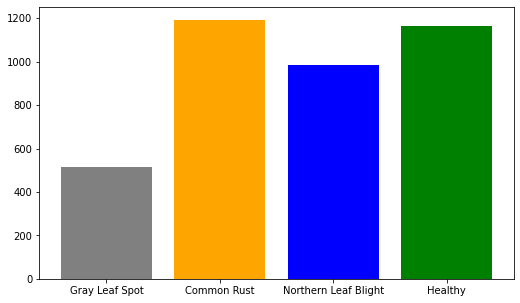

In [ ]:
total_gls = len(te_gls) + len(val_gls) + len(tr_gls)
total_cr = len(te_cr) + len(val_cr) + len(tr_cr)
total_nlb = len(te_nlb) + len(val_nlb) + len(tr_nlb)
total_hlt = len(te_hlt) + len(val_hlt) + len(tr_hlt)
total_images = total_gls + total_cr + total_nlb + total_hlt

print(total_gls, total_cr, total_nlb, total_hlt)
print(total_images)
fig = plt.figure(figsize=(8.5, 5))

plt.bar(['Gray Leaf Spot', 'Common Rust', 'Northern Leaf Blight', 'Healthy'], 
        [total_gls, total_cr, total_nlb, total_hlt], color=['gray', 'orange', 'blue', 'green'])

In [ ]:
# find file sizes
import cv2
import torch
import torchvision.transforms as transforms

file_shapes = 0

for i in total_files:
  i = cv2.imread(i) # returns np ndarray
  shp = i.shape[0]
  file_shapes += shp

mean_file_size = file_shapes/len(total_files)
print(mean_file_size)

256.0


In [ ]:
num_pixels = total_images * mean_file_size * mean_file_size

sum = 0
for i in total_files:
  i = cv2.imread(i)
  i = cv2.resize(i, (int(mean_file_size), int(mean_file_size)))
  transform = transforms.Compose([transforms.ToTensor()])
  i_tensor = transform(i)
  sum += i_tensor[0].sum() #sum across one channel, so grab 0th index
  mean = sum / num_pixels

sum_squared_error = 0 #std deviation
for i in total_files:
  i = cv2.imread(i)
  i = cv2.resize(i, (int(mean_file_size), int(mean_file_size)))
  transform = transforms.Compose([transforms.ToTensor()])
  i_tensor = transform(i)
  sum_squared_error += ((i_tensor[0] - mean)**2).sum()
  std_dev = (sum_squared_error / num_pixels) ** 0.5

print('Mean: ', mean)
print('Standard Deviation: ', std_dev)

Mean:  tensor(0.3785)
Standard Deviation:  tensor(0.2118)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

tr_image_data = []
val_image_data = []
te_image_data = []
tr_label_data = []
val_label_data = []
te_label_data = []


def loading_dataset(lst, data_list, label_list, yn_transforms):
  count = 0
  for i in lst: 
    if 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot' in i:
      label_list.append(int(0))
    elif 'Corn_(maize)___Common_rust_' in i:
      label_list.append(int(1))
    elif 'Corn_(maize)___Northern_Leaf_Blight' in i:
      label_list.append(int(2))
    elif 'Corn_(maize)___healthy' in i:
      label_list.append(int(3))
      
    img = cv2.imread(str(i))
    img = cv2.resize(img, (128, 128))

    if yn_transforms == True:
      transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomVerticalFlip(p=0.5),
                                      transforms.Normalize(mean, std_dev)])
        
      img = transform(img)

      if count % 5 == 0:
        additional_transform = transforms.Compose([transforms.RandomRotation(degrees=(90))])
        img = additional_transform(img)
        
      data_list.append(img)
      
    elif yn_transforms == False:
      transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean, std_dev)])
        
      img = transform(img)
      data_list.append(img)

    count += 1



In [ ]:
loading_dataset(train_files, tr_image_data, tr_label_data, True)
print(tr_image_data[0].shape)
# output has 3 channels, and is a 128 pixel by 128 pixel image

torch.Size([3, 128, 128])


In [ ]:
loading_dataset(val_files, val_image_data, val_label_data, True)
print(val_image_data[0].shape)


torch.Size([3, 128, 128])


In [ ]:
loading_dataset(test_files, te_image_data, te_label_data, False)
print(te_image_data[0].shape)

torch.Size([3, 128, 128])


In [ ]:
# check to see that labels and images align
print(len(tr_image_data), len(tr_label_data))
print(len(val_image_data), len(val_label_data))
print(len(te_image_data), len(te_label_data))

3080 3080
384 384
388 388


In [ ]:
# using batch of 32, so will reduce images to have data % 32 = 0

model_train_images = tr_image_data[:3072]
model_train_labels = tr_label_data[:3072]

model_val_images = val_image_data[:384]
model_val_labels = val_label_data[:384]

model_test_images = te_image_data[:384]
model_test_labels = te_label_data[:384]

print(len(model_train_images), len(model_train_labels))
print(len(model_val_images), len(model_val_labels))
print(len(model_test_images), len(model_test_labels))

3072 3072
384 384
384 384


In [ ]:
import random

training_data = list(zip(model_train_images, model_train_labels))
validation_data = list(zip(model_val_images, model_val_labels))
testing_data = list(zip(model_test_images, model_test_labels))

random.shuffle(training_data)
random.shuffle(validation_data)
random.shuffle(testing_data)

print(len(training_data))
print(len(validation_data))
print(len(testing_data))

3072
384
384


In [ ]:
trainloader = torch.utils.data.DataLoader(training_data, shuffle=True, batch_size=32)
validationloader = torch.utils.data.DataLoader(validation_data, shuffle=True, batch_size=32)
testloader = torch.utils.data.DataLoader(testing_data, shuffle=True, batch_size=32)

In [ ]:
print(len(trainloader))
print(len(validationloader))
print(len(testloader))

96
12
12


In [ ]:
categories = ['Gray Leaf Spot', 'Common Rust', 'Northern Leaf Blight', 'Healthy']

Training Images:
Common Rust 

torch.Size([32, 3, 128, 128])
32


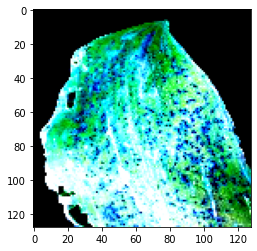


Validation Images:
Northern Leaf Blight 

torch.Size([32, 3, 128, 128])


32


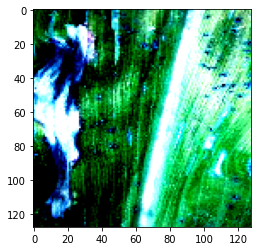


Testing Images:
Common Rust 

torch.Size([32, 3, 128, 128])
32


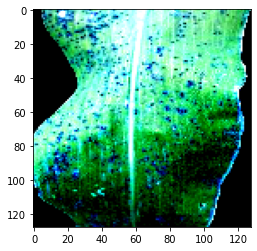

In [ ]:
print("Training Images:")
train_images_batch, train_label_batch = next(iter(trainloader))
print(categories[(train_label_batch[0])], "\n")
print(train_images_batch.shape)
print(len(train_label_batch))
train_images_batch = train_images_batch.permute(0,2,3,1)
plt.imshow(train_images_batch[0])
plt.show()

print('\n'+"Validation Images:")
val_images_batch, val_label_batch = next(iter(validationloader))
print(categories[(val_label_batch[0])], "\n")
print(val_images_batch.shape)
print(len(val_label_batch))
val_images_batch = val_images_batch.permute(0,2,3,1)
plt.imshow(val_images_batch[0])
plt.show()

print('\n'+"Testing Images:")
test_images_batch, test_label_batch = next(iter(testloader))
print(categories[(test_label_batch[0])], "\n")
print(test_images_batch.shape)
print(len(test_label_batch))
test_images_batch = test_images_batch.permute(0,2,3,1)
plt.imshow(test_images_batch[0])
plt.show()

In [ ]:
from torch.nn.modules.linear import Linear
from torch.nn.modules.batchnorm import BatchNorm2d
from torch import nn

model = nn.Sequential(
    # 128 x 128 x 3
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(16),
    # 128 x 128 x 16
    nn.MaxPool2d(2,2),
    # 64 x 64 x 16
    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    # 64 x 64 x 32
    nn.MaxPool2d(2,2),
    # 32, 32, 32
    nn.Flatten(),
    # 1 x 32768
    nn.Linear(32*32*32, 512),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(p=0.6),
    nn.Linear(256,4),
    nn.Softmax(dim=1)
)

In [ ]:
print(model)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=32768, out_features=512, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.7, inplace=False)
  (12): Linear(in_features=512, out_features=256, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.6, inplace=False)
  (15): Linear(in_features=256, out_features=4, bias=True)
  (16): Softmax(dim=1)
)


In [ ]:
input = torch.rand(1,3, 128, 128)
print(input.shape)

output = model(input)
print(output.shape)

torch.Size([1, 3, 128, 128])
torch.Size([1, 4])


In [ ]:
from torch import optim
import datetime 

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [ ]:
training_losses = []
validation_losses = []

epochs = 20 

for epoch in range(epochs):
  start_epoch = datetime.datetime.now()
  training_loss = 0
  validation_loss = 0
  model.train()
  for images, labels in trainloader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    training_loss += loss.item()

  model.eval()

  for images, labels in validationloader:
    images, labels = next(iter(validationloader))
    outputs = model(images)
    loss = criterion(outputs, labels)

    validation_loss += loss.item()

  mean_training_loss = training_loss / len(trainloader)
  mean_validation_loss = validation_loss / len(validationloader)

  training_losses.append(mean_training_loss)
  validation_losses.append(mean_validation_loss)

  print('Epoch: {} | Training Loss:{:.4f} | Validation Loss:{:.4f}'.format(epoch+1, mean_training_loss, mean_validation_loss))

  if mean_validation_loss <= min(validation_losses):
    torch.save(model.state_dict(), 'diseaseclassificationmodel.pth')

  end_epoch = datetime.datetime.now()
  print('Epoch time: ', str(end_epoch-start_epoch), '\n')

Epoch: 1 | Training Loss:0.8469 | Validation Loss:0.8414
Epoch time:  0:00:46.019834 

Epoch: 2 | Training Loss:0.8423 | Validation Loss:0.8355
Epoch time:  0:00:48.330393 

Epoch: 3 | Training Loss:0.8276 | Validation Loss:0.8354
Epoch time:  0:00:45.834720 

Epoch: 4 | Training Loss:0.8272 | Validation Loss:0.8316
Epoch time:  0:00:45.902047 

Epoch: 5 | Training Loss:0.8161 | Validation Loss:0.8371
Epoch time:  0:00:46.529464 

Epoch: 6 | Training Loss:0.8101 | Validation Loss:0.8226
Epoch time:  0:00:46.404203 

Epoch: 7 | Training Loss:0.8056 | Validation Loss:0.7965
Epoch time:  0:00:46.428568 

Epoch: 8 | Training Loss:0.7980 | Validation Loss:0.8220
Epoch time:  0:00:46.286909 

Epoch: 9 | Training Loss:0.7984 | Validation Loss:0.8268
Epoch time:  0:00:46.885456 

Epoch: 10 | Training Loss:0.7893 | Validation Loss:0.8080
Epoch time:  0:00:46.554341 

Epoch: 11 | Training Loss:0.7867 | Validation Loss:0.8006
Epoch time:  0:00:46.858526 

Epoch: 12 | Training Loss:0.7897 | Valida

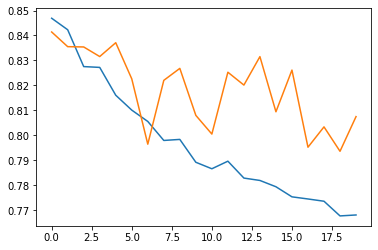

In [ ]:
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')

In [ ]:
import numpy as np

test_correct = [0,0,0,0]
test_total = [0,0,0,0] 
total_testing_loss = 0

for images, labels in testloader:
  torch.no_grad()
  outputs = model(images)
  testing_loss = criterion(outputs, labels)

  total_testing_loss += testing_loss.item()

  probabilities = torch.exp(outputs)
  top_probs, top_cats = probabilities.topk(1, dim=1)

  for i in range(32):
    label = labels.data[i]
    pred = top_cats[i]
    if label == pred:
      test_correct[label] +=1
    test_total[label] += 1

print('Testing Loss:', int(total_testing_loss)/len(testloader), '\n')

gls_acc = (test_correct[0]/test_total[0]) * 100
cr_acc = (test_correct[1]/test_total[1]) * 100
nlb_acc = (test_correct[2]/test_total[2]) * 100
hlt_acc = (test_correct[3]/test_total[3]) * 100

total_accuracy = (gls_acc + cr_acc + nlb_acc + hlt_acc) / 4

print("Total Testing Accuracy: {:.2f}".format(total_accuracy))
print("Gray Leaf Spot Accuracy: {:.2f} | ({}/{})".format(gls_acc, test_correct[0], test_total[0]))
print("Common Rust Accuracy: {:.2f} | ({}/{})".format(cr_acc, test_correct[1], test_total[1]))
print("Northern Leaf Blight Accuracy: {:.2f} | ({}/{})".format(nlb_acc, test_correct[2], test_total[2]))
print("Healthy Accuracy: {:.2f} | ({}/{})".format(hlt_acc, test_correct[3], test_total[3]))

Testing Loss: 0.75 

Total Testing Accuracy: 91.75
Gray Leaf Spot Accuracy: 73.08 | (38/52)
Common Rust Accuracy: 100.00 | (120/120)
Northern Leaf Blight Accuracy: 93.94 | (93/99)
Healthy Accuracy: 100.00 | (113/113)
